<a href="https://colab.research.google.com/github/danilovabg/SkillFactory/blob/master/hw_clustering_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install pandas==2.0.1
%pip install numpy 1.24.2
%pip install scikit-learn==1.2.2
import pandas
pandas.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.


ERROR: Could not find a version that satisfies the requirement 1.24.2 (from versions: none)
ERROR: No matching distribution found for 1.24.2


'1.5.3'

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, v_measure_score, homogeneity_score, completeness_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

In [4]:
df = pd.read_csv('snsdata.csv')
df.tail(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,2009,F,18.724,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = df[[ 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']]

In [9]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(df)

In [10]:
k_model = KMeans(random_state = 42, n_clusters=9)
k_model.fit(X_norm)
k_model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1033997971

In [12]:
s = k_model.predict(X_norm).tolist()
sc = {i: s.count(i) for i in range(9)}
sc

{0: 19659, 1: 930, 2: 1, 3: 4490, 4: 851, 5: 493, 6: 762, 7: 2098, 8: 716}

In [35]:
int_list, silh_list = [], []
for k in tqdm(range(3,10)):
    k_model = KMeans(random_state = 42, n_clusters=k, n_init = 'auto')
    k_model.fit(X_norm)
    int_list.append(k_model.inertia_), silh_list.append(silhouette_score(X_norm, k_model.predict(X_norm)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [44]:
np.argmin(np.array(int_list))+3

9

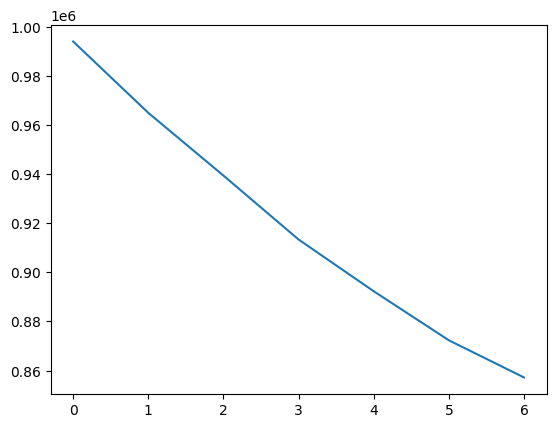

In [38]:
plt.plot(list(range(len(int_list))), int_list);


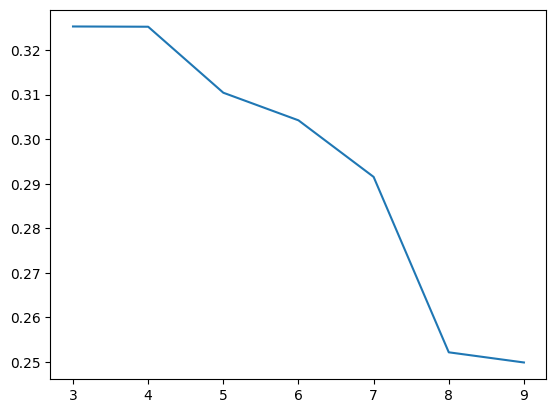

In [41]:
plt.plot(list([el + 3 for el in range(len(silh_list))]), silh_list);

In [45]:
k_model = KMeans(random_state = 42, n_clusters=3, n_init = 'auto')
k_model.fit(X_norm)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [46]:
s = k_model.predict(X_norm)

In [18]:
res_df = pd.DataFrame(df, columns = df.columns)
res_df['clust'] = s

In [81]:
res_df

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,clust
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
mean_df = res_df.groupby('clust').mean()

In [83]:
mean_df

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
clust,,,,,,,,,,,,,,,,,,,,,
0,0.199611,0.197900,0.187867,0.128952,0.111064,0.107447,0.073576,0.081976,0.075053,0.102780,...,0.048765,0.166634,0.259032,0.073731,0.029788,0.017850,0.123041,0.081353,0.049854,0.020027
1,0.673903,0.578431,0.432306,0.354809,0.335668,0.295985,0.305089,0.242764,0.161064,0.363212,...,0.323763,0.802054,0.917134,0.597106,0.310458,0.251167,0.549253,0.310224,0.315359,0.302988
2,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,327.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,6.000000,6.000000,0.000000


In [85]:

for row in range(mean_df.shape[0]):
    # print(mean_df.loc[row, :].sort_values(ascending = False))
    print(row, mean_df.loc[row, :].sort_values(ascending = False).keys()[:10])

0 Index(['music', 'god', 'dance', 'shopping', 'band', 'cute', 'hair',
       'basketball', 'football', 'soccer'],
      dtype='object')
1 Index(['hair', 'music', 'dance', 'god', 'cute', 'shopping', 'sex', 'mall',
       'rock', 'basketball'],
      dtype='object')
2 Index(['blonde', 'sex', 'hair', 'god', 'drunk', 'death', 'die', 'football',
       'dress', 'rock'],
      dtype='object')


In [17]:
em_model = GaussianMixture(random_state = 42, n_components = 3)
em_model.fit(X_norm)

s = em_model.predict(X_norm).tolist()
sc = {i: s.count(i) for i in range(3)}
sc

{0: 23426, 1: 6573, 2: 1}

In [20]:
res_df = pd.DataFrame(df, columns = df.columns)
res_df['clust'] = s
res_df[res_df['clust'] == 2]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,clust
14187,0,2,0,0,0,1,0,0,0,0,...,0,0,1,0,0,6,6,6,0,2


In [22]:
res_df.loc[14187, :].sort_values()

basketball        0
abercrombie       0
hollister         0
shopping          0
mall              0
bible             0
church            0
drugs             0
marching          0
kissed            0
hot               0
music             0
sports            0
tennis            0
baseball          0
cheerleading      0
soccer            0
softball          0
volleyball        0
sexy              1
cute              1
dance             1
band              1
rock              1
jesus             1
swimming          1
clothes           1
football          2
clust             2
dress             2
die               6
death             6
drunk             6
god              10
hair             12
sex              22
blonde          327
Name: 14187, dtype: int64

In [ ]:
res_df[res_df['clust'] == 2]

In [49]:
data = pd.read_csv('CC GENERAL.csv')
data.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [24]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
data['MINIMUM_PAYMENTS'].mean()

864.2065423050827

In [50]:
for c in data.columns:
    if data[c].isna().sum() > 0:
      m = data[c].mean()
      data[c] = data[c].fillna(m)

In [33]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [51]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(data.iloc[:, 1:])

In [52]:
X_norm[0][0]

-0.7319893664465486

In [71]:
int_list, silh_list = [], []
for k in tqdm(range(2, 10)):
    k_model = KMeans(random_state = 42, n_clusters=k, n_init = 'auto')
    k_model.fit(X_norm)
    int_list.append(k_model.inertia_), silh_list.append(silhouette_score(X_norm, k_model.predict(X_norm)))

100%|██████████| 8/8 [00:10<00:00,  1.37s/it]


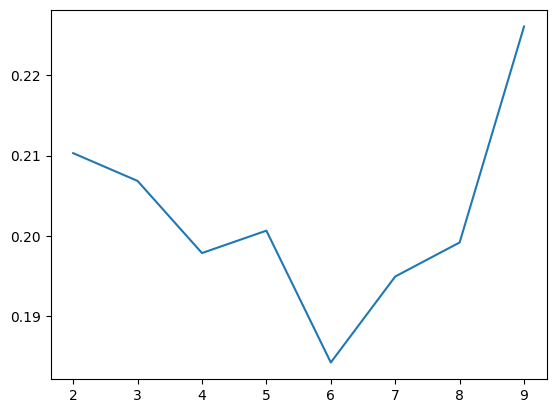

In [72]:
plt.plot(list([el + 2 for el in range(len(silh_list))]), silh_list);

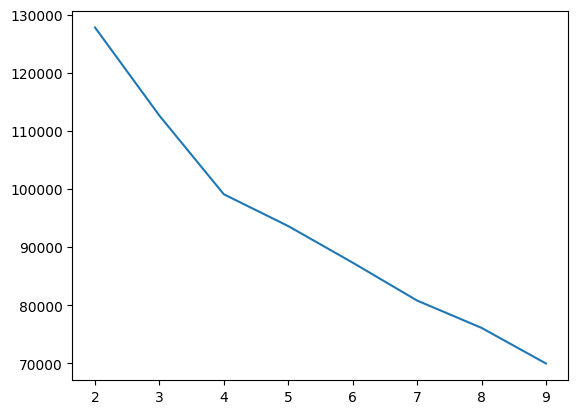

In [73]:
plt.plot(list([el +2 for el in range(len(int_list))]), int_list);

In [25]:
k_model = KMeans(random_state = 42, n_clusters=3)
k_model.fit(X_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [26]:
res_df = pd.DataFrame(data, columns = data.columns)
s = k_model.predict(X_norm).tolist()
res_df['clust'] = s

In [89]:
sc = {i: s.count(i) for i in range(3)}
sc

{0: 6118, 1: 1597, 2: 1235}

In [79]:
res_df[res_df['clust'] == 2].shape

(1240, 19)

In [14]:
X=X_norm

In [35]:
silh = 0
best_params = 0
for e in tqdm(np.arange(0.1,3,0.2)):
    for s in range(1,20,4):
      db_model = DBSCAN(eps = e, min_samples = s)
      if silhouette_score(X_norm, db_model.fit_predict(X_norm))> silh:
          silh = silhouette_score(X_norm, db_model.fit_predict(X_norm))
          best_params = (e, s)


100%|██████████| 15/15 [02:36<00:00, 10.44s/it]


In [37]:
silh, best_params

(0.6173453608696496, (2.900000000000001, 5))

In [24]:
len(set(s))

39

In [39]:
silh = 0
best_params = 0
for n in range(3, 10):
    ier_model = AgglomerativeClustering(n_clusters=n)
    if silhouette_score(X_norm, ier_model.fit_predict(X_norm))> silh:
          silh = silhouette_score(X_norm, ier_model.fit_predict(X_norm))
          best_params = n

In [40]:
silh, best_params

(0.17335577924064002, 6)

In [43]:
ier_model = AgglomerativeClustering(n_clusters=6)
s = ier_model.fit_predict(X_norm).tolist()
sc = {i: s.count(i) for i in range(9)}
sc

{0: 3946, 1: 2931, 2: 864, 3: 464, 4: 23, 5: 722, 6: 0, 7: 0, 8: 0}

In [53]:
X_norm.shape

(8950, 17)

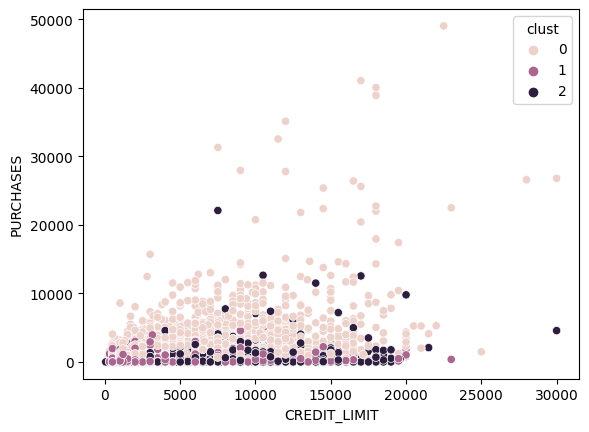

In [60]:
k_model = KMeans(random_state = 42, n_clusters=3, n_init = 'auto')
k_model.fit(X_norm)

res_df = pd.DataFrame(data, columns = data.columns)
res_df['clust'] = k_model.predict(X_norm)

sns.scatterplot(data=res_df, x='CREDIT_LIMIT', y='PURCHASES', hue='clust')
plt.show()

In [59]:
res_df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs', 'clust'],
      dtype='object')

In [58]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
train = np.loadtxt('train.txt')
test = np.loadtxt('test.txt')
train_set = np.concatenate([train, test], axis=0)
train_set.shape

(10299, 561)

In [9]:
y_train = np.loadtxt('train_labels.txt')
y_test = np.loadtxt('test_labels.txt')
y = np.concatenate([y_train, y_test], axis=0)
y.shape

(10299,)

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(train_set)

In [21]:
sil, num_s = 0, 0
kar, num_car = 0, 0
dev, num_dev = 100, 0
for n in tqdm(range(2, 10)):
    cl_model = KMeans(n_clusters=n, random_state = 42, algorithm='lloyd')
    cl_model.fit(X)
    s, k, d = silhouette_score(X, cl_model.predict(X)), calinski_harabasz_score(X, cl_model.predict(X)), davies_bouldin_score(X, cl_model.predict(X))
    if s > sil:
        sil = s
        num_s = n
    if k> kar:
        kar = k
        num_k = n
    if d < dev:
        dev = d
        num_d = n

print(f'\n siluet {sil:.2f} {num_s}, karab {kar:.2f} {num_k}, dev {dev:.2f}, {num_d}')

  0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 12%|█▎        | 1/8 [00:06<00:42,  6.12s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 25%|██▌       | 2/8 [00:13<00:42,  7.15s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 38%|███▊      | 3/8 [00:23<00:41,  8.37s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 


 siluet 0.39 2, karab 7880.81 2, dev 1.07, 2


In [25]:
cl_model = KMeans(n_clusters=6, random_state = 42, init = 'random')
cl_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=6, random_state=42)

In [29]:
homogeneity_score(y, cl_model.predict(X)), completeness_score(y, cl_model.predict(X)), adjusted_rand_score(y, cl_model.predict(X))

(0.5404114294595578, 0.5809491951515007, 0.4196031125923396)

In [41]:
res_dict = dict()
preds = cl_model.predict(X)+1

In [51]:
preds = list(cl_model.predict(X)+1)
for clust in set(y):
    my_list = []
    for i, el in enumerate(y):
      if el == clust:
          my_list.append(preds[i])
    elem_dict = {k: my_list.count(k) for k in set(y)}
    res_dict[clust] = elem_dict


In [52]:
res_dict

{1.0: {1.0: 0, 2.0: 0, 3.0: 903, 4.0: 78, 5.0: 741, 6.0: 0},
 2.0: {1.0: 0, 2.0: 0, 3.0: 1242, 4.0: 5, 5.0: 295, 6.0: 2},
 3.0: {1.0: 0, 2.0: 0, 3.0: 321, 4.0: 196, 5.0: 889, 6.0: 0},
 4.0: {1.0: 91, 2.0: 1238, 3.0: 1, 4.0: 0, 5.0: 0, 6.0: 447},
 5.0: {1.0: 0, 2.0: 1346, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 560},
 6.0: {1.0: 1556, 2.0: 54, 3.0: 5, 4.0: 0, 5.0: 0, 6.0: 329}}

In [54]:
cl_model = KMeans(n_clusters=2, random_state = 42, init = 'random')
cl_model.fit(X)

preds = list(cl_model.predict(X)+1)
for clust in set(y):
    my_list = []
    for i, el in enumerate(y):
      if el == clust:
          my_list.append(preds[i])
    elem_dict = {k: my_list.count(k) for k in set(y)}
    res_dict[clust] = elem_dict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
res_dict

{1.0: {1.0: 1722, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0},
 2.0: {1.0: 1536, 2.0: 8, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0},
 3.0: {1.0: 1406, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0},
 4.0: {1.0: 3, 2.0: 1774, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0},
 5.0: {1.0: 0, 2.0: 1906, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0},
 6.0: {1.0: 12, 2.0: 1932, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0}}

In [56]:
completeness_score(y, cl_model.predict(X))

0.9795305596996312

In [59]:
ier_model = AgglomerativeClustering(n_clusters=2)
preds = ier_model.fit_predict(X)

completeness_score(y, preds+1)

0.9999999999999993

In [60]:
from sklearn.decomposition import PCA
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(np.array(A))

In [61]:
principalComponents

array([[-2.30932461,  5.97129065],
       [ 6.87615329,  0.26773147],
       [-1.12880358, -1.81626914],
       [-2.98839369, -3.11563871],
       [-0.44963141, -1.30711427]])

In [4]:
df = pd.read_csv('Country-data.csv')
df.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [8]:
df.sort_values('life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.000,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
...,...,...,...,...,...,...,...,...,...,...
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, 1:])

In [12]:
X[0][0]

1.2915323778422956

In [8]:
X_df = pd.DataFrame(X, columns = df.columns[1:])

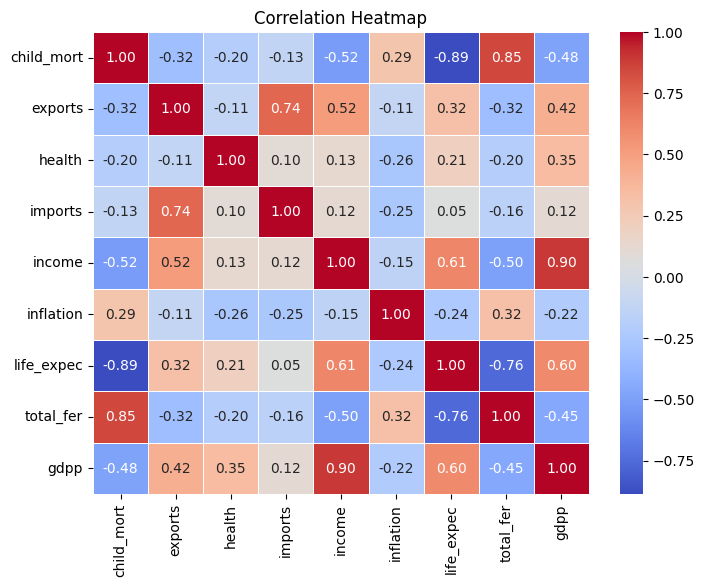

In [14]:
correlation_matrix = X_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [9]:
pca = PCA(n_components=0.9)
result_pca = pca.fit_transform(X_df)


In [22]:
abs(result_pca[0])

array([2.91302459, 0.09562058, 0.7181185 , 1.00525464, 0.15831004])

In [23]:
result_pca[0][0]/sum(abs(result_pca[0]))

-0.5956705528359184

In [24]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

Text(0.5, 1.0, 'Correlation Heatmap')

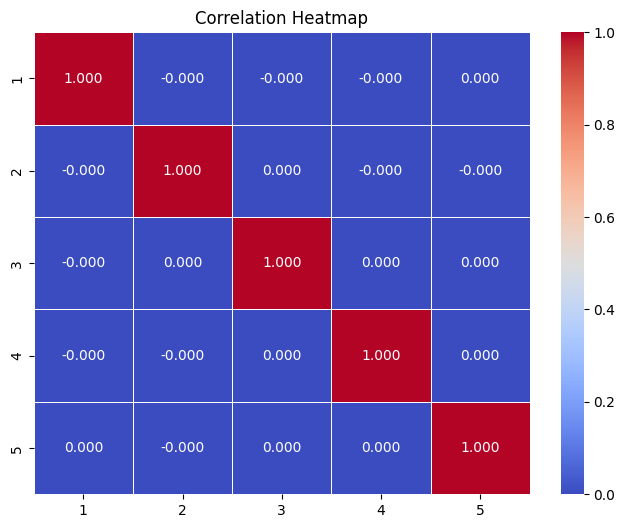

In [31]:
d = pd.DataFrame(result_pca, columns = [1, 2, 3, 4, 5])
correlation_matrix = d.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Heatmap')

In [10]:
int_list, silh_list = [], []
for k in tqdm(range(2,10)):
    k_model = KMeans(random_state = 42, n_clusters=k, n_init = 'auto')
    k_model.fit(result_pca)
    int_list.append(k_model.inertia_), silh_list.append(silhouette_score(result_pca, k_model.predict(result_pca)))

100%|██████████| 8/8 [00:00<00:00, 54.79it/s]


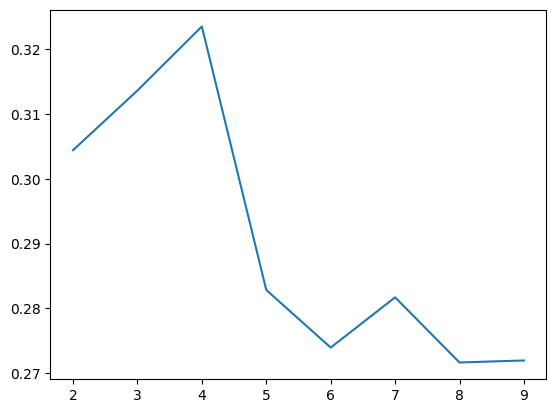

In [11]:
plt.plot(list([el + 2 for el in range(len(silh_list))]), silh_list);

In [16]:
k_model = KMeans(random_state = 1, n_clusters=4, init = 'k-means++')
k_model.fit(result_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [17]:
clust = k_model.predict(result_pca)
df['cluster'] = clust

In [18]:
df.sort_values('child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,3
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,3
...,...,...,...,...,...,...,...,...,...,...,...
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,1


In [19]:
df[df['cluster'] == 1].sort_values('life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,1
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,1
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
